# Face detection

In [3]:
# Importing required libraries

import cv2
import matplotlib.pyplot as plt
import numpy

In [4]:
# Reading images

nadia = cv2.imread('nadia.jpeg',0)
denis = cv2.imread('denis.jpg',0)
solvay = cv2.imread('solvay.jpg',0)
leo = cv2.imread('leo.jpeg',0)

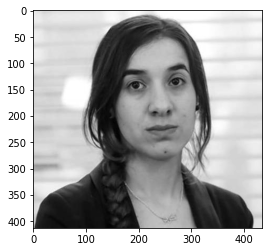

In [5]:
plt.imshow(nadia,cmap='gray')

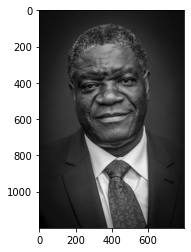

In [6]:
plt.imshow(denis,cmap='gray')

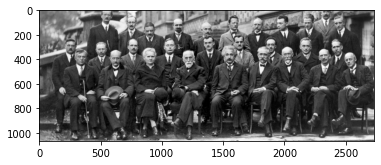

In [7]:
plt.imshow(solvay,cmap='gray')

In [8]:
# Converting image to cascade

face_cascade = cv2.CascadeClassifier('/Users/parth/Desktop/Jupyter/OpenCV_Face_Eye_detection/haarcascades/haarcascade_frontalface_default.xml')

In [9]:
# Function to detect faces

def detect_face(img):
    face_img = img.copy()
    face_rect = face_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in face_rect:
        cv2.rectangle(face_img,(x,y),(x+w,y+h), (255,0,0), 5) # w is the width belong to x and h is the height belongs to y
    
    return face_img

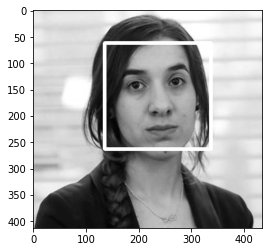

In [10]:
#Testing out image detection

img_nadia = detect_face(nadia)
plt.imshow(img_nadia, cmap='gray')

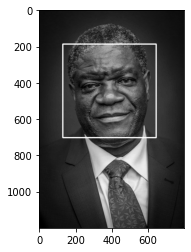

In [11]:
img_denis = detect_face(denis)
plt.imshow(img_denis, cmap='gray')

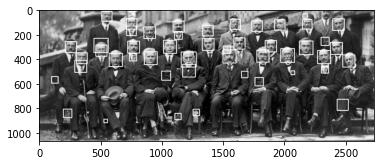

In [12]:
img_solvay = detect_face(solvay)
plt.imshow(img_solvay, cmap='gray')

In [13]:
# Function to remove extra rectangle captures from above image

def detect_face2(img):
    face_img = img.copy()
    face_rect = face_cascade.detectMultiScale(face_img, scaleFactor= 1.2, minNeighbors=5)
    
    for (x,y,w,h) in face_rect:
        cv2.rectangle(face_img,(x,y),(x+w,y+h), (255,0,0), 5)
    
    return face_img

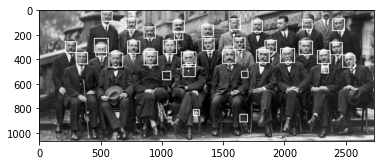

In [14]:
img_solvay = detect_face2(solvay)
plt.imshow(img_solvay, cmap='gray')

# Realtime face detection

In [15]:
# Using videocapture feature from cv2 

cap = cv2.VideoCapture(0) # 0 is the if of the local camera

while True:
    
    ret,frame = cap.read()
    
    frame = detect_face(frame)
    
    cv2.imshow('Camera', frame)
    
    c = cv2.waitKey(1)
    if c == 27:
        break

cap.release()
cv2.destroyAllWindows()
    
    

# Eye detection

In [16]:
eye_cascade = cv2.CascadeClassifier('/Users/parth/Desktop/Jupyter/OpenCV_Face_Eye_detection/haarcascades/haarcascade_eye.xml')

In [17]:
# Function to detect eyes

def detect_eye(img):
    eye_img = img.copy()
    eye_rect = eye_cascade.detectMultiScale(eye_img,scaleFactor= 1.2)
    
    for (x,y,w,h) in eye_rect:
        cv2.rectangle(eye_img,(x,y),(x+w,y+h), (255,0,0), 5) # w is the width belong to x and h is the height belongs to y
    
    return eye_img

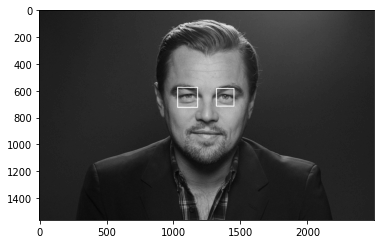

In [18]:
#Testing out eye detection

eye_leo = detect_eye(leo)
plt.imshow(eye_leo, cmap='gray')

# Realtime eye detection

In [19]:
Using videocapture feature from cv2 

cap = cv2.VideoCapture(0) 

while True:
    
    ret,frame = cap.read()
    
    frame = detect_eye(frame)
    
    cv2.imshow('Camera', frame)
    
    c = cv2.waitKey(1)
    if c == 27:
        break

cap.release()
cv2.destroyAllWindows()

# Realtime Smile detection

In [20]:
smile_cascade = cv2.CascadeClassifier('/Users/parth/Desktop/Jupyter/OpenCV_Face_Eye_detection/haarcascades/haarcascade_smile.xml')

In [26]:
cap = cv2.VideoCapture(0) 

while True:

    ret,frame = cap.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    face_rect = face_cascade.detectMultiScale(gray, scaleFactor = 1.1, minNeighbors = 5)
    for (x,y,w,h) in face_rect:
        img = cv2.rectangle(frame, (x,y),(x+w,y+h), (255,0,0), 5)
        
        smile_rect = smile_cascade.detectMultiScale(gray, scaleFactor = 1.8,minNeighbors = 20)
        for (x,y,w,h) in smile_rect:
            img = cv2.rectangle(frame , (x,y), (x+w,y+h), (0,0,255), 5)
    
    cv2.imshow('Camera', frame)
    c = cv2.waitKey(1)
    
    if c == 27:
        break

cap.release()
cv2.destroyAllWindows()

